# License Plate Detection with OpenCV

In this project we demonstrate how to use OpenCV only, with traditional computer vision approaches, to perform License Plate Detection (LPD). 

We follow two approaches:

1- __Morphology based approach__: where only morphological transforms are used, along with some rules to detect the LP.

2- __Charater based approach__: in addition to basic morphological approaches, basic char detection, also based on morphology, is used as an extra characteristic of the LP.

Further, the problem of Licence Plate Recognition (LPR), by recognizing the number and digits written, can be addressed by the second approach.

In both approaches, we load HD videos (1080p). Due to the camera position, this is the most effective resolution to detect LP patterns.

In both approaches we merge car detection, using background subtraction, to narrow the search space.

For more details, please see [full documentation](doc/DOC.md), and the executable example [notebook](doc/LPD.ipynb)

# Pre-requisites

You need to install the packages in `requirements.txt`:
    
`pip install -r requirements.txt`

# How to run?

You can run over a video, or single image as follows:

## Video input
You can call the `process_video` as follows:

In [7]:
from video import process_video
from char import detect_LP
video_file = 'dat/detection_test.mp4'
video_output_file = 'dat/char_LP_detection.mp4'
process_video(video_file, video_output_file, detect_LP_fn=detect_LP)

100%|██████████| 2171/2171 [04:54<00:00,  7.36it/s]

Video is ready at:  dat/char_LP_detection.mp4


Note that, you can choose the approach by importing `detect_LP` from char or morpho 

You can also do the same from the command line:

In [8]:
!python main.py --video_file dat/detection_test.mp4 --video_output_file dat/cars_detection.mp4 --detect_LP_fn 1

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
100%|███████████████████████████████████████| 2171/2171 [04:14<00:00,  8.52it/s]
Video is ready at:  dat/cars_detection.mp4


![git](imgs/LPD_char_with_cars.gif)

## Single image
You can use the `char.detect_LP` or `morpho.detect_LP`

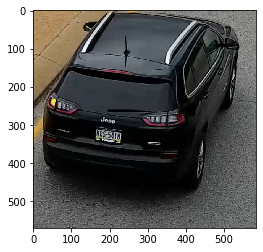

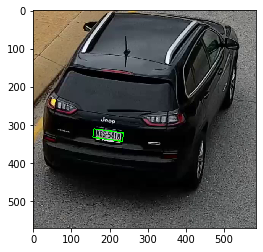

In [7]:
import cv2
from utils import plot_img
from char import detect_LP_char
img  = cv2.imread("imgs/char_frame_180_car_no_lp1.png")
plot_img(img)
detected_img, LPs = detect_LP_char(img)
plot_img(detected_img)

You can further debug, and calibrate the rules via the internal functions `char.detect_LP_char` or `char.detect_LP_morpho`

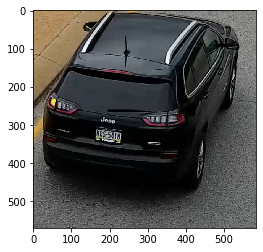

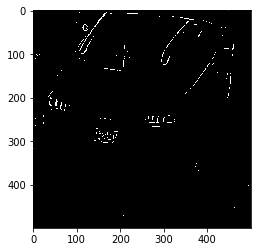

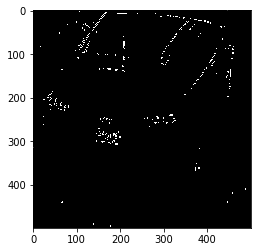

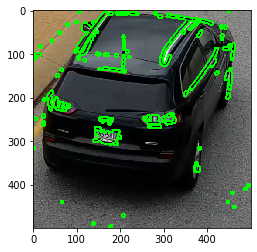

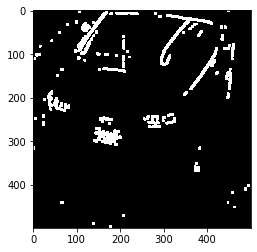

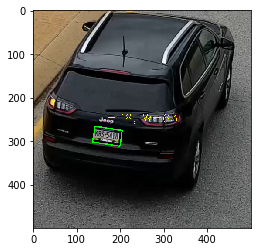

In [8]:
import cv2
from utils import plot_img
from morpho import detect_LP_morpho
img  = cv2.imread("imgs/char_frame_180_car_no_lp1.png")
plot_img(img)
detected_img, LPs = detect_LP_morpho(cv2.resize(img, (500,500)), L_min=35, L_max=60, W_min=55, W_max=90, debug=True)
plot_img(detected_img)

# References
- https://www.pyimagesearch.com/2015/05/25/basic-motion-detection-and-tracking-with-python-and-opencv/
- https://sod.pixlab.io/articles/license-plate-detection.html
- https://github.com/MicrocontrollersAndMore/OpenCV_3_License_Plate_Recognition_Python.git